# pyCisTopic scATAC processing

Code based on https://pycistopic.readthedocs.io/en/latest/notebooks/human_cerebellum.html

In this notebook, we rerun the analysis for Q3 cells completely separately

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [ ]:
!pwd

In [4]:
os.chdir(os.getcwd())

In [5]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

# Get cell annotation from RNA

In [6]:
import scanpy as sc

In [ ]:
rna = sc.read_h5ad("multiome_adata_Q3_long_09072025.h5ad") # load in the RNA data; you may need to adjust this path

In [8]:
rna

AnnData object with n_obs × n_vars = 2306 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'doublet_outlier_colors', 'fina

In [9]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,final_annotations
AAACAGCCAGCATGGA-Q3,Q3,9672.0,2903,7.973844,13159.5,9.484975,18.207379,10.973062,5.076181,0.0,...,5,1,0,0,27,B-cell lineage,0.266856,Pro-B cells,0.742999,Tumour (Q3)
AAACAGCCATGCTATG-Q3,Q3,0.0,1103,7.006695,3278.0,8.095294,18.974985,13.270288,8.114704,0.0,...,2,11,48,144,217,B cells,0.122094,Pro-B cells,0.738682,Tumour (Q3)
AAACATGCATGAATCT-Q3,Q3,12271.0,2386,7.777793,10110.0,9.221379,19.663699,13.244313,6.221562,0.0,...,7,4,3,135,230,B-cell lineage,0.427889,Pro-B cells,0.950191,Tumour (Q3)
AAACCAACAGCATTAT-Q3,Q3,22577.0,2829,7.948032,13032.0,9.475240,23.760743,18.400860,5.517189,0.0,...,4,3,29,31,72,B-cell lineage,0.955364,Pro-B cells,0.997784,Tumour (Q3)
AAACCGAAGCACAGAA-Q3,Q3,7983.0,1469,7.293018,5170.0,8.550821,19.110251,12.843328,5.531915,0.0,...,4,5,15,67,196,B-cell lineage,0.996637,Pro-B cells,0.618289,Tumour (Q3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,9,6,4,5,106,B-cell lineage,0.930010,Pro-B cells,0.984357,Tumour (Q3)
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,7,4,3,18,13,B-cell lineage,0.403587,Pro-B cells,0.973642,Tumour (Q3)
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,3,22,32,115,25,B cells,0.484664,Pro-B cells,0.177973,Tumour (Q3)
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,11,10,14,7,0,Monocytes,0.745200,Non-classical monocytes,0.041574,Non-classical monocytes


In [10]:
rna.obs.celltypist_cell_label_fine.value_counts()

Pro-B cells                  1941
Tcm/Naive helper T cells      171
Tem/Trm cytotoxic T cells      89
Non-classical monocytes        37
Classical monocytes            26
pDC                            22
CD16+ NK cells                 20
Name: celltypist_cell_label_fine, dtype: int64

In [11]:
rna.obs[["sample","celltypist_cell_label_fine"]].value_counts()

sample  celltypist_cell_label_fine
Q3      Pro-B cells                   1941
        Tcm/Naive helper T cells       171
        Tem/Trm cytotoxic T cells       89
        Non-classical monocytes         37
        Classical monocytes             26
        pDC                             22
        CD16+ NK cells                  20
dtype: int64

/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


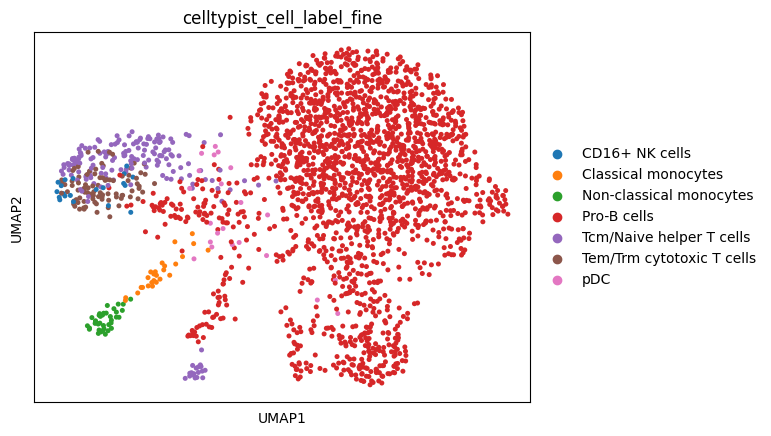

In [12]:
sc.pl.umap(rna, color = "celltypist_cell_label_fine")

In [13]:
rna

AnnData object with n_obs × n_vars = 2306 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'doublet_outlier_colors', 'fina

In [14]:
# removing less common cell types to avoid cistopic error
filtered_obs = rna.obs.groupby(["sample","celltypist_cell_label_fine"]).filter(lambda x: len(x) >= 10)
rna = rna[rna.obs.index.isin(filtered_obs.index)]

In [15]:
rna

View of AnnData object with n_obs × n_vars = 2306 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'doublet_outlier_colors

In [ ]:
# you may need to adjust the paths below accordingly
atac_CB = pd.read_csv('/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz', header = None)
rna_CB = pd.read_csv('barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz', header = None)

In [17]:
rna_CB.rename(columns={0: 'rna_CB'}, inplace=True)
rna_CB

,rna_CB
0,AAACAGCCAAACAACA
1,AAACAGCCAAACATAG
2,AAACAGCCAAACCCTA
3,AAACAGCCAAACCTAT
4,AAACAGCCAAACCTTG
...,...
736315,TTTGTTGGTTTGGGTA
736316,TTTGTTGGTTTGGTTC
736317,TTTGTTGGTTTGTCTA
736318,TTTGTTGGTTTGTGGA


In [18]:
atac_CB.rename(columns={0: 'atac_CB'}, inplace=True)
atac_CB

,atac_CB
0,ACAGCGGGTGTGTTAC
1,ACAGCGGGTTGTTCTT
2,ACAGCGGGTAACAGGC
3,ACAGCGGGTGCGCGAA
4,ACAGCGGGTCCTCCAT
...,...
736315,CGTACTTCACATAGCA
736316,CGTACTTCACATGCAA
736317,CGTACTTCAGGTTGTA
736318,CGTACTTCAACCCTTG


In [19]:
df_merged =  pd.concat([rna_CB, atac_CB], axis=1)
df_merged.head()

,rna_CB,atac_CB
0,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC
1,AAACAGCCAAACATAG,ACAGCGGGTTGTTCTT
2,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC
3,AAACAGCCAAACCTAT,ACAGCGGGTGCGCGAA
4,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT


In [20]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,final_annotations
AAACAGCCAGCATGGA-Q3,Q3,9672.0,2903,7.973844,13159.5,9.484975,18.207379,10.973062,5.076181,0.0,...,5,1,0,0,27,B-cell lineage,0.266856,Pro-B cells,0.742999,Tumour (Q3)
AAACAGCCATGCTATG-Q3,Q3,0.0,1103,7.006695,3278.0,8.095294,18.974985,13.270288,8.114704,0.0,...,2,11,48,144,217,B cells,0.122094,Pro-B cells,0.738682,Tumour (Q3)
AAACATGCATGAATCT-Q3,Q3,12271.0,2386,7.777793,10110.0,9.221379,19.663699,13.244313,6.221562,0.0,...,7,4,3,135,230,B-cell lineage,0.427889,Pro-B cells,0.950191,Tumour (Q3)
AAACCAACAGCATTAT-Q3,Q3,22577.0,2829,7.948032,13032.0,9.475240,23.760743,18.400860,5.517189,0.0,...,4,3,29,31,72,B-cell lineage,0.955364,Pro-B cells,0.997784,Tumour (Q3)
AAACCGAAGCACAGAA-Q3,Q3,7983.0,1469,7.293018,5170.0,8.550821,19.110251,12.843328,5.531915,0.0,...,4,5,15,67,196,B-cell lineage,0.996637,Pro-B cells,0.618289,Tumour (Q3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,9,6,4,5,106,B-cell lineage,0.930010,Pro-B cells,0.984357,Tumour (Q3)
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,7,4,3,18,13,B-cell lineage,0.403587,Pro-B cells,0.973642,Tumour (Q3)
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,3,22,32,115,25,B cells,0.484664,Pro-B cells,0.177973,Tumour (Q3)
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,11,10,14,7,0,Monocytes,0.745200,Non-classical monocytes,0.041574,Non-classical monocytes


In [21]:
rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]

/tmp/ipykernel_4010847/3635066835.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]


In [22]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,final_annotations,base_index
AAACAGCCAGCATGGA-Q3,Q3,9672.0,2903,7.973844,13159.5,9.484975,18.207379,10.973062,5.076181,0.0,...,1,0,0,27,B-cell lineage,0.266856,Pro-B cells,0.742999,Tumour (Q3),AAACAGCCAGCATGGA
AAACAGCCATGCTATG-Q3,Q3,0.0,1103,7.006695,3278.0,8.095294,18.974985,13.270288,8.114704,0.0,...,11,48,144,217,B cells,0.122094,Pro-B cells,0.738682,Tumour (Q3),AAACAGCCATGCTATG
AAACATGCATGAATCT-Q3,Q3,12271.0,2386,7.777793,10110.0,9.221379,19.663699,13.244313,6.221562,0.0,...,4,3,135,230,B-cell lineage,0.427889,Pro-B cells,0.950191,Tumour (Q3),AAACATGCATGAATCT
AAACCAACAGCATTAT-Q3,Q3,22577.0,2829,7.948032,13032.0,9.475240,23.760743,18.400860,5.517189,0.0,...,3,29,31,72,B-cell lineage,0.955364,Pro-B cells,0.997784,Tumour (Q3),AAACCAACAGCATTAT
AAACCGAAGCACAGAA-Q3,Q3,7983.0,1469,7.293018,5170.0,8.550821,19.110251,12.843328,5.531915,0.0,...,5,15,67,196,B-cell lineage,0.996637,Pro-B cells,0.618289,Tumour (Q3),AAACCGAAGCACAGAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,6,4,5,106,B-cell lineage,0.930010,Pro-B cells,0.984357,Tumour (Q3),TTTGTGAAGCATGAAG
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,4,3,18,13,B-cell lineage,0.403587,Pro-B cells,0.973642,Tumour (Q3),TTTGTGAAGCGAGTAA
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,22,32,115,25,B cells,0.484664,Pro-B cells,0.177973,Tumour (Q3),TTTGTGGCAGCCTGCA
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,10,14,7,0,Monocytes,0.745200,Non-classical monocytes,0.041574,Non-classical monocytes,TTTGTTGGTAAACAAG


In [23]:
rna.obs['sample'] 

AAACAGCCAGCATGGA-Q3    Q3
AAACAGCCATGCTATG-Q3    Q3
AAACATGCATGAATCT-Q3    Q3
AAACCAACAGCATTAT-Q3    Q3
AAACCGAAGCACAGAA-Q3    Q3
                       ..
TTTGTGAAGCATGAAG-Q3    Q3
TTTGTGAAGCGAGTAA-Q3    Q3
TTTGTGGCAGCCTGCA-Q3    Q3
TTTGTTGGTAAACAAG-Q3    Q3
TTTGTTGGTTAAGCTG-Q3    Q3
Name: sample, Length: 2306, dtype: category
Categories (1, object): ['Q3']

In [24]:
rna.obs['sample'].value_counts()

Q3    2306
Name: sample, dtype: int64

In [25]:
# mapping atac barcodes based on rna
mapping_dict = pd.Series(df_merged['atac_CB'].values, index=df_merged['rna_CB']).to_dict()
rna.obs['atac_CB'] = rna.obs['base_index'].map(mapping_dict)

In [26]:
rna.obs['atac_CB'] = rna.obs['atac_CB'].astype(str) + '-'+ rna.obs['sample'].astype(str)
rna.obs['atac_CB']

AAACAGCCAGCATGGA-Q3    ACAGCGGGTAGCCTTG-Q3
AAACAGCCATGCTATG-Q3    ACAGCGGGTCACCAGC-Q3
AAACATGCATGAATCT-Q3    CATTTAGGTTTATGTG-Q3
AAACCAACAGCATTAT-Q3    CTTTATCGTTGAGGGT-Q3
AAACCGAAGCACAGAA-Q3    TGACTATTCTTAAGGA-Q3
                              ...         
TTTGTGAAGCATGAAG-Q3    GTAGGTGTCAGTGAAC-Q3
TTTGTGAAGCGAGTAA-Q3    GTAGGTGTCGGTCCAT-Q3
TTTGTGGCAGCCTGCA-Q3    GTTTGGTGTTTCTAAG-Q3
TTTGTTGGTAAACAAG-Q3    CGTACTTCAAATATGC-Q3
TTTGTTGGTTAAGCTG-Q3    CGTACTTCATGATGAT-Q3
Name: atac_CB, Length: 2306, dtype: object

In [27]:
rna_cell_type = rna.obs[['atac_CB','celltypist_cell_label_fine']] # subset to keep info on atac cb and cell type only

In [28]:
rna_cell_type

,atac_CB,celltypist_cell_label_fine
AAACAGCCAGCATGGA-Q3,ACAGCGGGTAGCCTTG-Q3,Pro-B cells
AAACAGCCATGCTATG-Q3,ACAGCGGGTCACCAGC-Q3,Pro-B cells
AAACATGCATGAATCT-Q3,CATTTAGGTTTATGTG-Q3,Pro-B cells
AAACCAACAGCATTAT-Q3,CTTTATCGTTGAGGGT-Q3,Pro-B cells
AAACCGAAGCACAGAA-Q3,TGACTATTCTTAAGGA-Q3,Pro-B cells
...,...,...
TTTGTGAAGCATGAAG-Q3,GTAGGTGTCAGTGAAC-Q3,Pro-B cells
TTTGTGAAGCGAGTAA-Q3,GTAGGTGTCGGTCCAT-Q3,Pro-B cells
TTTGTGGCAGCCTGCA-Q3,GTTTGGTGTTTCTAAG-Q3,Pro-B cells
TTTGTTGGTAAACAAG-Q3,CGTACTTCAAATATGC-Q3,Non-classical monocytes


In [29]:
# replace + signs with pos and white spaces with underscore
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('/','_')
rna_cell_type['celltypist_cell_label_fine'].value_counts()

/tmp/ipykernel_4010847/2305620188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
/tmp/ipykernel_4010847/2305620188.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
/tmp/ipykernel_4010847/2305620188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Pro-B_cells                  1941
Tcm_Naive_helper_T_cells      171
Tem_Trm_cytotoxic_T_cells      89
Non-classical_monocytes        37
Classical_monocytes            26
pDC                            22
CD16pos_NK_cells               20
Name: celltypist_cell_label_fine, dtype: int64

In [30]:
rna_cell_type = rna_cell_type.set_index('atac_CB')
rna_cell_type = rna_cell_type.rename(columns={'celltypist_cell_label_fine': 'cell_type'})

In [31]:
rna_cell_type

,cell_type
atac_CB,
ACAGCGGGTAGCCTTG-Q3,Pro-B_cells
ACAGCGGGTCACCAGC-Q3,Pro-B_cells
CATTTAGGTTTATGTG-Q3,Pro-B_cells
CTTTATCGTTGAGGGT-Q3,Pro-B_cells
TGACTATTCTTAAGGA-Q3,Pro-B_cells
...,...
GTAGGTGTCAGTGAAC-Q3,Pro-B_cells
GTAGGTGTCGGTCCAT-Q3,Pro-B_cells
GTTTGGTGTTTCTAAG-Q3,Pro-B_cells


In [32]:
rna_cell_type["sample_id"] = rna_cell_type.index.str.split('-').str[1]

In [33]:
rna_cell_type.loc[rna_cell_type['cell_type'] == 'Pro-B_cells', 'cell_type'] = rna_cell_type['cell_type'] + '_'+ rna_cell_type['sample_id'].astype(str)

In [34]:
rna_cell_type['cell_type'].value_counts()

Pro-B_cells_Q3               1941
Tcm_Naive_helper_T_cells      171
Tem_Trm_cytotoxic_T_cells      89
Non-classical_monocytes        37
Classical_monocytes            26
pDC                            22
CD16pos_NK_cells               20
Name: cell_type, dtype: int64

# Get pseudobulks

In [ ]:
fragments_dict = {
    "Q3":"/processing/atac/fragments/Q3_corrected.tsv.gz"
}

In [36]:
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes.head()

,Chromosome,Start,End
0,chr1,0,248956422
1,chr2,0,242193529
2,chr3,0,198295559
3,chr4,0,190214555
4,chr5,0,181538259


In [ ]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
os.makedirs(os.path.join(out_dir, "consensus_peak_calling"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"), exist_ok = True)


bw_paths, bed_paths = export_pseudobulk(
    input_data = rna_cell_type,
    variable = "cell_type",
    sample_id_col = "sample_id",
    chromsizes = chromsizes,
    bed_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"),
    bigwig_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"),
    path_to_fragments = fragments_dict,
    n_cpu = 20,
    normalize_bigwig = True,
    temp_dir = "/tmp",
    split_pattern = "-"
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-10 19:31:43,017	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2025-07-10 19:31:43,377 cisTopic     INFO     Splitting fragments by cell type.
2025-07-10 19:32:34,138 cisTopic     INFO     generating bigwig files


In [38]:
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv"), "wt") as f:
    for v in bw_paths:
        _ = f.write(f"{v}\t{bw_paths[v]}\n")

In [39]:
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv"), "wt") as f:
    for v in bed_paths:
        _ = f.write(f"{v}\t{bed_paths[v]}\n")

# Inferring the consensus peaks

In [ ]:
bw_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bw_paths.update({v: p})

In [ ]:
bed_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bed_paths.update({v: p})

In [42]:
bed_paths

{'Pro-B_cells_Q3': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q3.fragments.tsv.gz',
 'Non-classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Non-classical_monocytes.fragments.tsv.gz',
 'Tem_Trm_cytotoxic_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tem_Trm_cytotoxic_T_cells.fragments.tsv.gz',
 'Classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Classical_monocytes.fragments.tsv.gz',
 'Tcm_Naive_helper_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tcm_Naive_helper_T_cells.fragments.tsv.gz',
 'pDC': 'outs/consensus_peak_calling/pseudobulk_bed_files/pDC.fragments.tsv.gz',
 'CD16pos_NK_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/CD16pos_NK_cells.fragments.tsv.gz'}

In [ ]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'hs',
    n_cpu = 20,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/ray_spill'
)

2025-07-10 19:33:19,256	INFO worker.py:1724 -- Started a local Ray instance.


(macs_call_peak_ray pid=4012043) 2025-07-10 19:33:22,766 cisTopic     INFO     Calling peaks for Classical_monocytes with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Classical_monocytes.fragments.tsv.gz --name Classical_monocytes  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=4012052) 2025-07-10 19:33:22,764 cisTopic     INFO     Calling peaks for pDC with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/pDC.fragments.tsv.gz --name pDC  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=4012040) 2025-07-10 19:33:22,730 cisTopic     INFO     Calling peaks for Tcm_Naive_helper_T_cells with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Tcm

In [ ]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/regions/hg38-blacklist.v2.bed" # you may need to adjust this path
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2025-07-10 19:34:48,268 cisTopic     INFO     Extending and merging peaks per class
2025-07-10 19:35:01,210 cisTopic     INFO     Normalizing peak scores
2025-07-10 19:35:01,308 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2025-07-10 19:35:17,425 cisTopic     INFO     Done!


In [45]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passin

# QC

In [46]:
!pycistopic tss gene_annotation_list --server http://may2024.archive.ensembl.org/ | grep Human

hsapiens_gene_ensembl	Human genes (GRCh38.p14)


In [47]:
!mkdir -p outs/qc
!pycistopic tss get_tss \
    --output outs/qc/tss.bed \
    --name "hsapiens_gene_ensembl" \
    --to-chrom-source ucsc \
    --server http://may2024.archive.ensembl.org/ \
    --ucsc hg38

- Get TSS annotation from Ensembl BioMart with the following settings:
  - biomart_name: "hsapiens_gene_ensembl"
  - biomart_host: "http://may2024.archive.ensembl.org/"
  - transcript_type: ['protein_coding']
  - use_cache: True
- Getting chromosome sizes and alias mapping for "hg38" from UCSC.
- Update chromosome names in TSS annotation to "ucsc" chromosome names.
- Writing TSS annotation BED file to "outs/qc/tss.bed".


In [48]:
!head outs/qc/tss.bed | column -t

/bin/bash: line 1: column: command not found
head: write error: Broken pipe


In [49]:
regions_bed_filename = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
tss_bed_filename = os.path.join(out_dir, "qc", "tss.bed")

pycistopic_qc_commands_filename = "pycistopic_qc_commands.sh"

# Create text file with all pycistopic qc command lines.
with open(pycistopic_qc_commands_filename, "w") as fh:
    for sample, fragment_filename in fragments_dict.items():
        print(
            "pycistopic qc",
            f"--fragments {fragment_filename}",
            f"--regions {regions_bed_filename}",
            f"--tss {tss_bed_filename}",
            f'--output {os.path.join(out_dir, "qc")}/{sample}',
            sep=" ",
            file=fh,
        )

In [ ]:
!cat pycistopic_qc_commands.sh

**In command line**

Mkae sure you conda env with pycistopic is activated when running this
```
chmod u+x pycistopic_qc_commands.sh
pycistopic_qc_commands.sh
```

In [51]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt

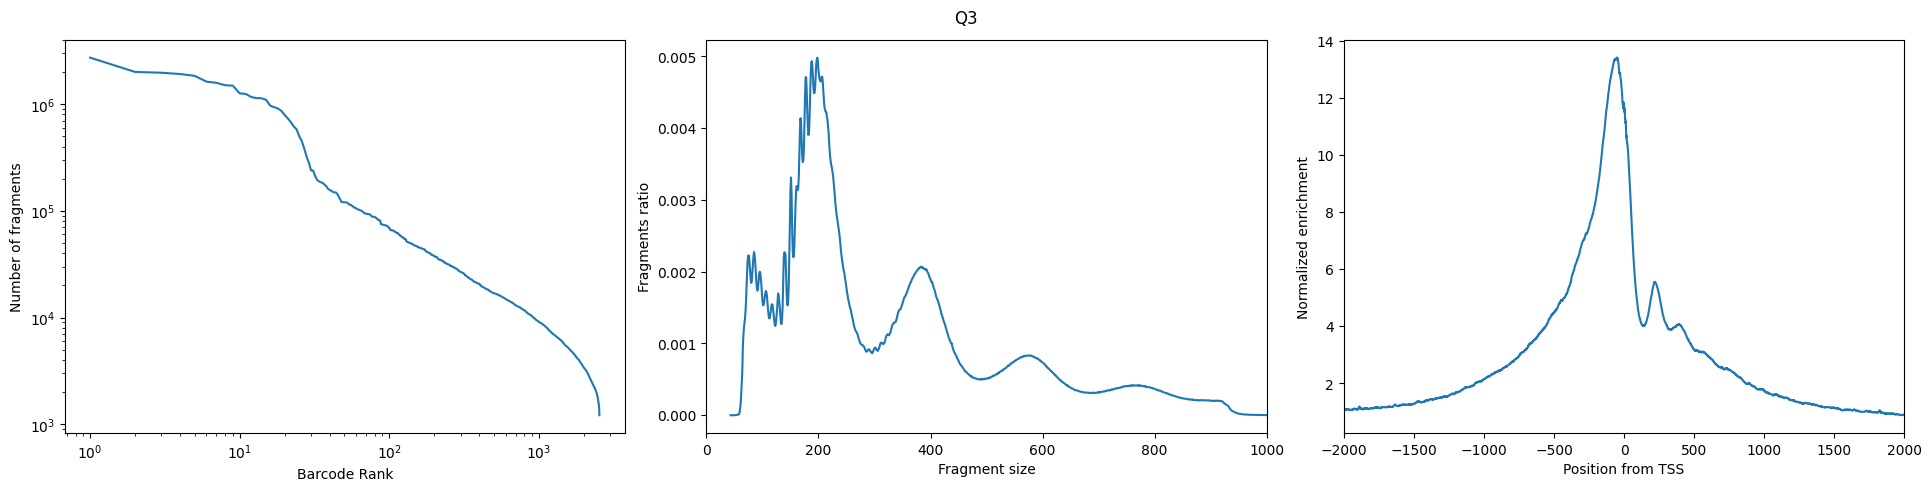

In [52]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig) 

In [53]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = 1000, # use automatic thresholding when you specify None
            tss_enrichment_threshold = 10, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

Q3:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10


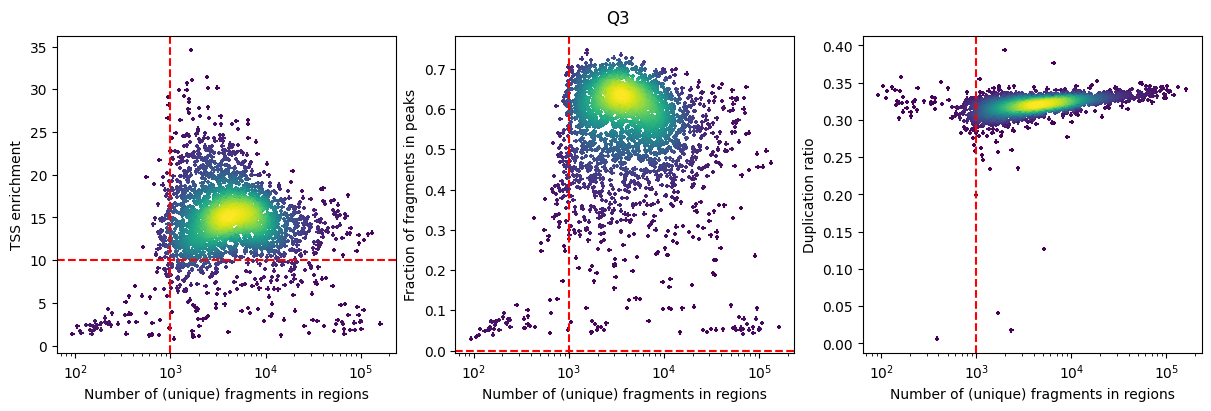

In [54]:
for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id] 
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_cell_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig)

# Creating a cisTopic object

In [ ]:
path_to_regions = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
path_to_blacklist="/regions/hg38-blacklist.v2.bed" # you may need to adjust this path
pycistopic_qc_output_dir = "outs/qc"

from pycisTopic.cistopic_class import create_cistopic_object_from_fragments
import polars as pl

cistopic_obj_list = []
for sample_id in fragments_dict:
    sample_metrics = pl.read_parquet(
        os.path.join(pycistopic_qc_output_dir, f'{sample_id}.fragments_stats_per_cb.parquet')
    ).to_pandas().set_index("CB").loc[ sample_id_to_barcodes_passing_filters[sample_id] ]
    cistopic_obj = create_cistopic_object_from_fragments(
        path_to_fragments = fragments_dict[sample_id],
        path_to_regions = path_to_regions,
        path_to_blacklist = path_to_blacklist,
        metrics = sample_metrics,
        valid_bc = sample_id_to_barcodes_passing_filters[sample_id],
        n_cpu = 5,
        project = sample_id,
        split_pattern = '-'
    )
    cistopic_obj_list.append(cistopic_obj)

2025-07-10 19:43:00,867 cisTopic     INFO     Reading data for Q3
2025-07-10 19:43:37,199 cisTopic     INFO     metrics provided!
2025-07-10 19:43:40,116 cisTopic     INFO     Counting fragments in regions


2025-07-10 19:43:43,537	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-10 19:43:52,204 cisTopic     INFO     Creating fragment matrix
2025-07-10 19:43:58,898 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-10 19:44:00,771 cisTopic     INFO     Removing blacklisted regions
2025-07-10 19:44:01,283 cisTopic     INFO     Creating CistopicObject
2025-07-10 19:44:01,669 cisTopic     INFO     Done!


In [56]:
cistopic_obj = cistopic_obj_list[0]
print(cistopic_obj)

CistopicObject from project Q3 with n_cells × n_regions = 2201 × 135253


In [57]:
from pycisTopic.cistopic_class import merge
cistopic_obj = merge(cistopic_obj_list)

In [58]:
cistopic_obj

In [59]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,unique_fragments_in_peaks_count,log10_unique_fragments_in_peaks_count,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode
CAATTGCGTGTCCTGA-Q3___Q3,8093,3.90811,6899,3.838786,Q3,722,18802,4.274227,12731,4.104897,...,7644,3.883377,0.600424,6071,0.322891,18.716607,0.037338,3.636055,39.597764,CAATTGCGTGTCCTGA
GATATGATCAAATCAG-Q3___Q3,29006,4.462488,19971,4.3004,Q3,151,70274,4.846801,46819,4.670431,...,27315,4.436417,0.583417,23455,0.333765,14.776859,0.018805,0.488778,8.019168,GATATGATCAAATCAG
CCGTTAGGTCATGCCA-Q3___Q3,39178,4.593042,25455,4.405773,Q3,90,110808,5.044575,74151,4.870123,...,36968,4.567838,0.498550,36657,0.330815,13.437118,0.013276,0.304004,5.813456,CCGTTAGGTCATGCCA
TCAATGAAGGTATAGC-Q3___Q3,52072,4.716604,29737,4.473297,Q3,84,122911,5.089594,82194,4.914845,...,48863,4.688989,0.594484,40717,0.331272,16.882098,0.005128,0.239843,4.211933,TCAATGAAGGTATAGC
AAGGTATGTTAGGTTC-Q3___Q3,9050,3.956649,7517,3.876045,Q3,662,20286,4.307218,13764,4.138776,...,8529,3.930949,0.619660,6522,0.321503,13.880112,0.088176,3.190930,33.899777,AAGGTATGTTAGGTTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3.419129,2315,3.364551,Q3,1919,5354,3.728759,3723,3.571010,...,2473,3.393400,0.664249,1631,0.304632,15.559262,0.091211,3.887817,14.348173,CCTCAGCCATGAGCCG
CGAGCGAGTATTGAGG-Q3___Q3,1404,3.147367,1265,3.102091,Q3,2353,3185,3.503246,2215,3.345570,...,1336,3.126131,0.603160,970,0.304553,22.123131,0.013062,2.372573,13.501362,CGAGCGAGTATTGAGG
GCTATGCTCCACTATG-Q3___Q3,1578,3.198107,1412,3.149835,Q3,2306,3383,3.529430,2340,3.369401,...,1481,3.170848,0.632906,1043,0.308306,29.901446,0.002743,2.684477,17.941550,GCTATGCTCCACTATG
GTTGTCATCATGCCTA-Q3___Q3,1653,3.218273,1435,3.156852,Q3,2407,3109,3.492760,2058,3.313656,...,1536,3.186674,0.746356,1051,0.338051,15.715973,0.050342,0.366145,2.426678,GTTGTCATCATGCCTA


## Doublet filtering

In [ ]:
# atac - filter all cells with UMI > 60,000
dbl = cistopic_obj.cell_data.total_fragments_count > 60000
cistopic_obj.cell_data['doublets_atac'] = dbl
cistopic_obj.cell_data['doublets_atac'].value_counts()

False    2085
True      116
Name: doublets_atac, dtype: int64

In [ ]:
# rna
rna_dbl = pd.read_csv('/barcode_doublet.tsv', sep = '\t') # remove RNA doublets - you may neeed to adjust the path
rna_dbl['base_index'] = rna_dbl['Unnamed: 0'].str.split('-').str[0]
rna_dbl['sample'] = rna_dbl['Unnamed: 0'].str.split('-').str[1]
rna_dbl['atac_CB'] = rna_dbl['base_index'].map(mapping_dict)
rna_dbl['pycistopic_CB'] = rna_dbl['atac_CB'] +'-' + rna_dbl['sample'] + '___'+ rna_dbl['sample']
rna_dbl = rna_dbl[['doublet_outlier','pycistopic_CB']]
rna_dbl = rna_dbl.set_index('pycistopic_CB')
rna_dbl

,doublet_outlier
pycistopic_CB,
ACAGCGGGTGTTACTA-D0___D0,False
ACAGCGGGTTTATCCT-D0___D0,False
ACAGCGGGTTCACTTT-D0___D0,False
CATTTAGGTGTCCACA-D0___D0,False
CTTTATCGTCGAGGCA-D0___D0,False
...,...
GTAGGTGTCGGTCCAT-Q3___Q3,False
GTAGGTGTCCCAATAT-Q3___Q3,True
GTTTGGTGTTTCTAAG-Q3___Q3,False


In [62]:
cistopic_obj.cell_data = cistopic_obj.cell_data.join(rna_dbl, how='left')
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
CAATTGCGTGTCCTGA-Q3___Q3,8093,3.90811,6899,3.838786,Q3,722,18802,4.274227,12731,4.104897,...,0.600424,6071,0.322891,18.716607,0.037338,3.636055,39.597764,CAATTGCGTGTCCTGA,False,False
GATATGATCAAATCAG-Q3___Q3,29006,4.462488,19971,4.3004,Q3,151,70274,4.846801,46819,4.670431,...,0.583417,23455,0.333765,14.776859,0.018805,0.488778,8.019168,GATATGATCAAATCAG,True,True
CCGTTAGGTCATGCCA-Q3___Q3,39178,4.593042,25455,4.405773,Q3,90,110808,5.044575,74151,4.870123,...,0.498550,36657,0.330815,13.437118,0.013276,0.304004,5.813456,CCGTTAGGTCATGCCA,True,True
TCAATGAAGGTATAGC-Q3___Q3,52072,4.716604,29737,4.473297,Q3,84,122911,5.089594,82194,4.914845,...,0.594484,40717,0.331272,16.882098,0.005128,0.239843,4.211933,TCAATGAAGGTATAGC,True,True
AAGGTATGTTAGGTTC-Q3___Q3,9050,3.956649,7517,3.876045,Q3,662,20286,4.307218,13764,4.138776,...,0.619660,6522,0.321503,13.880112,0.088176,3.190930,33.899777,AAGGTATGTTAGGTTC,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3.419129,2315,3.364551,Q3,1919,5354,3.728759,3723,3.571010,...,0.664249,1631,0.304632,15.559262,0.091211,3.887817,14.348173,CCTCAGCCATGAGCCG,False,False
CGAGCGAGTATTGAGG-Q3___Q3,1404,3.147367,1265,3.102091,Q3,2353,3185,3.503246,2215,3.345570,...,0.603160,970,0.304553,22.123131,0.013062,2.372573,13.501362,CGAGCGAGTATTGAGG,False,False
GCTATGCTCCACTATG-Q3___Q3,1578,3.198107,1412,3.149835,Q3,2306,3383,3.529430,2340,3.369401,...,0.632906,1043,0.308306,29.901446,0.002743,2.684477,17.941550,GCTATGCTCCACTATG,False,False
GTTGTCATCATGCCTA-Q3___Q3,1653,3.218273,1435,3.156852,Q3,2407,3109,3.492760,2058,3.313656,...,0.746356,1051,0.338051,15.715973,0.050342,0.366145,2.426678,GTTGTCATCATGCCTA,False,False


In [63]:
cistopic_obj.cell_data[cistopic_obj.cell_data['doublet_outlier'] == True]

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
GATATGATCAAATCAG-Q3___Q3,29006,4.462488,19971,4.3004,Q3,151,70274,4.846801,46819,4.670431,...,0.583417,23455,0.333765,14.776859,0.018805,0.488778,8.019168,GATATGATCAAATCAG,True,True
CCGTTAGGTCATGCCA-Q3___Q3,39178,4.593042,25455,4.405773,Q3,90,110808,5.044575,74151,4.870123,...,0.498550,36657,0.330815,13.437118,0.013276,0.304004,5.813456,CCGTTAGGTCATGCCA,True,True
TCAATGAAGGTATAGC-Q3___Q3,52072,4.716604,29737,4.473297,Q3,84,122911,5.089594,82194,4.914845,...,0.594484,40717,0.331272,16.882098,0.005128,0.239843,4.211933,TCAATGAAGGTATAGC,True,True
CGCGTGACATGACCTT-Q3___Q3,12547,4.09854,9986,3.999392,Q3,435,28152,4.449525,18856,4.275473,...,0.624417,9296,0.330207,14.972167,0.065317,1.867074,23.045829,CGCGTGACATGACCTT,False,True
AGTTTCTAGCTTTAAC-Q3___Q3,29684,4.472522,19228,4.283934,Q3,143,72629,4.861116,48750,4.687984,...,0.572041,23879,0.328781,15.010448,0.017331,0.487004,8.244769,AGTTTCTAGCTTTAAC,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCCCTCGTCATTTCT-Q3___Q3,1374,3.137987,1277,3.106191,Q3,1767,6441,3.809021,4327,3.636287,...,0.297204,2114,0.328210,12.119897,0.050980,0.273785,8.240491,ATCCCTCGTCATTTCT,False,True
TCGGCCATCGCGAGTA-Q3___Q3,7731,3.888236,6254,3.796158,Q3,686,19563,4.291458,13274,4.123035,...,0.548667,6289,0.321474,15.613157,0.106970,2.838333,38.849481,TCGGCCATCGCGAGTA,False,True
GAGTGATTCTGTGCTA-Q3___Q3,7039,3.847511,5961,3.775319,Q3,851,16028,4.204906,10841,4.035109,...,0.614427,5187,0.323621,18.179847,0.056349,3.943732,42.397712,GAGTGATTCTGTGCTA,False,True
ATCCCGCCATGACAGC-Q3___Q3,2097,3.321598,1873,3.272538,Q3,2111,4328,3.636388,3041,3.483159,...,0.644525,1287,0.297366,20.512937,0.024791,3.538615,6.494024,ATCCCGCCATGACAGC,False,True


In [ ]:
cistopic_obj.cell_data['doublet_outlier'].isna().value_counts()
# there are some NaNs

False    2107
True       94
Name: doublet_outlier, dtype: int64

In [65]:
# fill nans as False so NaNs are kept in
cistopic_obj.cell_data['doublet_outlier'] = cistopic_obj.cell_data['doublet_outlier'].fillna(False)

In [66]:
cells_to_keep = cistopic_obj.cell_data[(cistopic_obj.cell_data['doublet_outlier'] == False) & (cistopic_obj.cell_data['doublets_atac'] == False)].index.tolist()
len(cells_to_keep)

1972

In [67]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 2201 × 135253


In [ ]:
# doublet barcodes - save for future
cistopic_obj.cell_data[
    (cistopic_obj.cell_data.total_fragments_count > 60000)
].index.to_series().to_csv('outs/barcode_doublets_atac_Q3.csv', index = False)

In [70]:
cistopic_obj.subset(cells=cells_to_keep)

In [71]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
CAATTGCGTGTCCTGA-Q3___Q3,8093,3.90811,6899,3.838786,Q3,722,18802,4.274227,12731,4.104897,...,0.600424,6071,0.322891,18.716607,0.037338,3.636055,39.597764,CAATTGCGTGTCCTGA,False,False
AAGGTATGTTAGGTTC-Q3___Q3,9050,3.956649,7517,3.876045,Q3,662,20286,4.307218,13764,4.138776,...,0.619660,6522,0.321503,13.880112,0.088176,3.190930,33.899777,AAGGTATGTTAGGTTC,False,False
CGTAATCGTGCGATTT-Q3___Q3,10870,4.03623,9022,3.955303,Q3,494,25198,4.401383,17018,4.230934,...,0.606769,8180,0.324629,16.567720,0.062638,2.670509,31.473391,CGTAATCGTGCGATTT,False,False
TGGATTCGTGCAGTAA-Q3___Q3,9479,3.976763,7824,3.893429,Q3,613,21848,4.339432,14707,4.167554,...,0.609574,7141,0.326849,14.695512,0.092411,3.156253,35.039859,TGGATTCGTGCAGTAA,False,False
CAAGGCTCACTAGCTT-Q3___Q3,8877,3.948266,7491,3.87454,Q3,425,28665,4.457367,19211,4.283573,...,0.435219,9454,0.329810,13.159253,0.076996,0.783648,28.313047,CAAGGCTCACTAGCTT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3.419129,2315,3.364551,Q3,1919,5354,3.728759,3723,3.571010,...,0.664249,1631,0.304632,15.559262,0.091211,3.887817,14.348173,CCTCAGCCATGAGCCG,False,False
CGAGCGAGTATTGAGG-Q3___Q3,1404,3.147367,1265,3.102091,Q3,2353,3185,3.503246,2215,3.345570,...,0.603160,970,0.304553,22.123131,0.013062,2.372573,13.501362,CGAGCGAGTATTGAGG,False,False
GCTATGCTCCACTATG-Q3___Q3,1578,3.198107,1412,3.149835,Q3,2306,3383,3.529430,2340,3.369401,...,0.632906,1043,0.308306,29.901446,0.002743,2.684477,17.941550,GCTATGCTCCACTATG,False,False
GTTGTCATCATGCCTA-Q3___Q3,1653,3.218273,1435,3.156852,Q3,2407,3109,3.492760,2058,3.313656,...,0.746356,1051,0.338051,15.715973,0.050342,0.366145,2.426678,GTTGTCATCATGCCTA,False,False


In [72]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Add metadata to cistopic object

In [73]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
CAATTGCGTGTCCTGA-Q3___Q3,8093,3.90811,6899,3.838786,Q3,722,18802,4.274227,12731,4.104897,...,0.600424,6071,0.322891,18.716607,0.037338,3.636055,39.597764,CAATTGCGTGTCCTGA,False,False
AAGGTATGTTAGGTTC-Q3___Q3,9050,3.956649,7517,3.876045,Q3,662,20286,4.307218,13764,4.138776,...,0.619660,6522,0.321503,13.880112,0.088176,3.190930,33.899777,AAGGTATGTTAGGTTC,False,False
CGTAATCGTGCGATTT-Q3___Q3,10870,4.03623,9022,3.955303,Q3,494,25198,4.401383,17018,4.230934,...,0.606769,8180,0.324629,16.567720,0.062638,2.670509,31.473391,CGTAATCGTGCGATTT,False,False
TGGATTCGTGCAGTAA-Q3___Q3,9479,3.976763,7824,3.893429,Q3,613,21848,4.339432,14707,4.167554,...,0.609574,7141,0.326849,14.695512,0.092411,3.156253,35.039859,TGGATTCGTGCAGTAA,False,False
CAAGGCTCACTAGCTT-Q3___Q3,8877,3.948266,7491,3.87454,Q3,425,28665,4.457367,19211,4.283573,...,0.435219,9454,0.329810,13.159253,0.076996,0.783648,28.313047,CAAGGCTCACTAGCTT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3.419129,2315,3.364551,Q3,1919,5354,3.728759,3723,3.571010,...,0.664249,1631,0.304632,15.559262,0.091211,3.887817,14.348173,CCTCAGCCATGAGCCG,False,False
CGAGCGAGTATTGAGG-Q3___Q3,1404,3.147367,1265,3.102091,Q3,2353,3185,3.503246,2215,3.345570,...,0.603160,970,0.304553,22.123131,0.013062,2.372573,13.501362,CGAGCGAGTATTGAGG,False,False
GCTATGCTCCACTATG-Q3___Q3,1578,3.198107,1412,3.149835,Q3,2306,3383,3.529430,2340,3.369401,...,0.632906,1043,0.308306,29.901446,0.002743,2.684477,17.941550,GCTATGCTCCACTATG,False,False
GTTGTCATCATGCCTA-Q3___Q3,1653,3.218273,1435,3.156852,Q3,2407,3109,3.492760,2058,3.313656,...,0.746356,1051,0.338051,15.715973,0.050342,0.366145,2.426678,GTTGTCATCATGCCTA,False,False


In [74]:
import pandas as pd

cistopic_obj.add_cell_data(rna_cell_type) # use data from rna for cell type
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

Columns ['sample_id'] will be overwritten


In [75]:
cistopic_obj.cell_data


,cisTopic_nr_frag,total_fragments_in_peaks_count,pdf_values_for_tss_enrichment,cisTopic_log_nr_frag,log10_unique_fragments_in_peaks_count,doublet_outlier,fraction_of_fragments_in_peaks,duplication_count,barcode_rank,duplication_ratio,...,tss_enrichment,total_fragments_count,unique_fragments_count,cisTopic_log_nr_acc,cisTopic_nr_acc,log10_total_fragments_count,pdf_values_for_duplication_ratio,doublets_atac,cell_type,sample_id
CAATTGCGTGTCCTGA-Q3___Q3,8093,11343,0.037338,3.90811,3.883377,False,0.600424,6071,722,0.322891,...,18.716607,18802,12731,3.838786,6899,4.274227,39.597764,False,Pro-B_cells_Q3,Q3
AAGGTATGTTAGGTTC-Q3___Q3,9050,12536,0.088176,3.956649,3.930949,False,0.619660,6522,662,0.321503,...,13.880112,20286,13764,3.876045,7517,4.307218,33.899777,False,Pro-B_cells_Q3,Q3
CGTAATCGTGCGATTT-Q3___Q3,10870,15205,0.062638,4.03623,4.013974,False,0.606769,8180,494,0.324629,...,16.567720,25198,17018,3.955303,9022,4.401383,31.473391,False,Pro-B_cells_Q3,Q3
TGGATTCGTGCAGTAA-Q3___Q3,9479,13269,0.092411,3.976763,3.952599,False,0.609574,7141,613,0.326849,...,14.695512,21848,14707,3.893429,7824,4.339432,35.039859,False,Pro-B_cells_Q3,Q3
CAAGGCTCACTAGCTT-Q3___Q3,8877,12402,0.076996,3.948266,3.922310,False,0.435219,9454,425,0.329810,...,13.159253,28665,19211,3.87454,7491,4.457367,28.313047,False,Pro-B_cells_Q3,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTCAGCCATGAGCCG-Q3___Q3,2625,3567,0.091211,3.419129,3.393400,False,0.664249,1631,1919,0.304632,...,15.559262,5354,3723,3.364551,2315,3.728759,14.348173,False,Tem_Trm_cytotoxic_T_cells,Q3
CGAGCGAGTATTGAGG-Q3___Q3,1404,1939,0.013062,3.147367,3.126131,False,0.603160,970,2353,0.304553,...,22.123131,3185,2215,3.102091,1265,3.503246,13.501362,False,Pro-B_cells_Q3,Q3
GCTATGCTCCACTATG-Q3___Q3,1578,2160,0.002743,3.198107,3.170848,False,0.632906,1043,2306,0.308306,...,29.901446,3383,2340,3.149835,1412,3.529430,17.941550,False,Tem_Trm_cytotoxic_T_cells,Q3
GTTGTCATCATGCCTA-Q3___Q3,1653,2338,0.050342,3.218273,3.186674,False,0.746356,1051,2407,0.338051,...,15.715973,3109,2058,3.156852,1435,3.492760,2.426678,False,Pro-B_cells_Q3,Q3


In [76]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q3               1460
Tcm_Naive_helper_T_cells      143
Tem_Trm_cytotoxic_T_cells      78
Non-classical_monocytes        31
Classical_monocytes            24
CD16pos_NK_cells               19
pDC                            18
Name: cell_type, dtype: int64

# CisTopic running

In [79]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

/bin/bash: line 1: wget: command not found


In [ ]:
!cat 02_pycistopic_modelling.py

In [ ]:
!cat 02_pycistopic_modelling.slurm 

In [ ]:
!mkdir -p /ray_spill/mallet/tutorial/

and I submitted 02_pycistopic_modelling.slurm  as a slurm job 
```
sbatch 02_pycistopic_modelling.slurm
```

In [82]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     